# PyTorch Simple Linear Regression

In the Jupyter Notebook, a simple linear regression machine learning algorithm using PyTorch is implemented with Python programming. The linear regression model makes predictions about a person's salary. If an employee has more experience, the higher output salary prediction from the Linear Regression model. The less employee experience, the lower the salary output prediction from the Linear Regression model. The ScikitLearn machine learning library with NumPy, Matplotlib, Pandas and Scipy has been used to process the data and evaluate performance metrics from the Linear Regression model.

Although this is a very small dataset for a model to make predictions on, it provides an introduction to machine learning and how to use the PyTorch framework simultaneously.

In [119]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

# 1.Load the Salary Dataset

Salary Dataset Available at:

https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [120]:
# loads the dataset examples using Pandas
df = pd.read_csv('Salary_dataset.csv')

df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# 2. Pre-Process the Data

In [121]:
# Indexes the second column of the input Pandas DataFrame (features)
X = df.iloc[:,1:2]

X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [122]:
# Indexes the third column of the input Pandas DataFrame (targets)
y =  df.iloc[:,2:3]

y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


# 3. Split the Dataset into Training and Test Sets

In [123]:
from sklearn.model_selection import train_test_split

# Splits the training and testing datasets from the input data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# prints out the number of training and testing dataset examples to the screen
print(len(X_train))
print(len(X_test))

24
6


# 4. Convert the Pandas DataFrames for the Data to NumPy Arrays, then to PyTorch Tensors

In [124]:
# Convert the feature vectors and the target vector to a NumPy array
# in preparation for converting to PyTorch tensors
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [125]:
# Convert the feature vector to a PyTorch tensor
X = torch.from_numpy(X_train)
X

tensor([[10.4000],
        [ 8.8000],
        [ 4.1000],
        [ 1.2000],
        [ 2.3000],
        [ 5.2000],
        [ 3.0000],
        [ 4.2000],
        [ 4.1000],
        [ 8.0000],
        [ 1.4000],
        [ 1.6000],
        [ 9.1000],
        [ 2.1000],
        [ 7.2000],
        [ 9.6000],
        [ 6.0000],
        [10.6000],
        [ 6.9000],
        [ 3.3000],
        [ 4.0000],
        [ 4.6000],
        [ 6.1000],
        [ 3.1000]])

In [126]:
# Convert the target vector to a PyTorch tensor
y = torch.from_numpy(y_train)
y

tensor([[122392.],
        [109432.],
        [ 56958.],
        [ 39344.],
        [ 39892.],
        [ 66030.],
        [ 56643.],
        [ 57082.],
        [ 55795.],
        [101303.],
        [ 46206.],
        [ 37732.],
        [105583.],
        [ 43526.],
        [ 98274.],
        [116970.],
        [ 81364.],
        [121873.],
        [ 91739.],
        [ 54446.],
        [ 63219.],
        [ 61112.],
        [ 93941.],
        [ 60151.]])

# 5. Linear Regression PyTorch Object

In [127]:
# PyTorch autograd library import
from torch.autograd import Variable

# Simple PyTorch Linear Regression model object
class LinearRegression(torch.nn.Module):
    
    # Constructs the simple linear regression model object
    def __init__(self, inputShape, outputShape):
        super(LinearRegression, self).__init__()
        
        # PyTorch 1D linear layer as found in one layer of a neural network
        self.linear = torch.nn.Linear(inputShape, outputShape)

    # Python method to feed the data through the algorithm in the forward pass direction
    def forward(self, x):
        
        # Out variable to store the Linear Regression output prediction
        out = self.linear(x)
        
        # Returns the output prediction from the forward method
        return out

In [128]:
# Linear Regression PyTorch model stored in the model variable
model = LinearRegression(inputShape=1,
                         outputShape=1)

In [129]:
# Prints out the model parameters to the screen
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

# 6. Define the MSE loss and SGD Optimiser Functions

In [130]:
# Defines the Mean Squared Error (MSE) loss function
criterion = torch.nn.MSELoss()

# Defines the Stochastic Gradient Descent (SGD) Optimiser function
# The learning rate is set at 0.01 (lr)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 7. Linear Regression Training Loop

In [131]:
# Sets the number of epochs for training
epochs = 100

# Python list to store the training loss after each epoch
MSE = []

# Runs the training loop for the PyTorch Linear Regression model
for epoch in range(epochs):
   
    # Input variable for the training features
    features = Variable(X)
    
    # Input variable for the training labels
    targets = Variable(y)

    # Clear gradient buffers after every epoch to stop
    # gradients from being carried forward to the next 
    # epoch causing accumulated gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(features)

    # Calulate the loss for the predicted output
    loss = criterion(outputs, targets)
    print(loss)
    
    # Appends the loss values to the MSE list
    MSE.append(loss.detach().numpy())
    
    # get gradients w.r.t automatic differentiation to parameters
    loss.backward()

    # update weight parameters
    optimizer.step()

    # Prints out the training epoch and MSE loss metric to the screen
    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(6.2712e+09, grad_fn=<MseLossBackward0>)
epoch 0, loss 6271154176.0
tensor(5.5416e+08, grad_fn=<MseLossBackward0>)
epoch 1, loss 554161024.0
tensor(1.6879e+08, grad_fn=<MseLossBackward0>)
epoch 2, loss 168788144.0
tensor(1.4193e+08, grad_fn=<MseLossBackward0>)
epoch 3, loss 141925040.0
tensor(1.3918e+08, grad_fn=<MseLossBackward0>)
epoch 4, loss 139176816.0
tensor(1.3806e+08, grad_fn=<MseLossBackward0>)
epoch 5, loss 138058496.0
tensor(1.3706e+08, grad_fn=<MseLossBackward0>)
epoch 6, loss 137058144.0
tensor(1.3607e+08, grad_fn=<MseLossBackward0>)
epoch 7, loss 136074016.0
tensor(1.3510e+08, grad_fn=<MseLossBackward0>)
epoch 8, loss 135099152.0
tensor(1.3413e+08, grad_fn=<MseLossBackward0>)
epoch 9, loss 134133024.0
tensor(1.3318e+08, grad_fn=<MseLossBackward0>)
epoch 10, loss 133175584.0
tensor(1.3223e+08, grad_fn=<MseLossBackward0>)
epoch 11, loss 132226648.0
tensor(1.3129e+08, grad_fn=<MseLossBackward0>)
epoch 12, loss 131286272.0
tensor(1.3035e+08, grad_fn=<MseLossBackward0>)


# 8. Plot the Training Loss

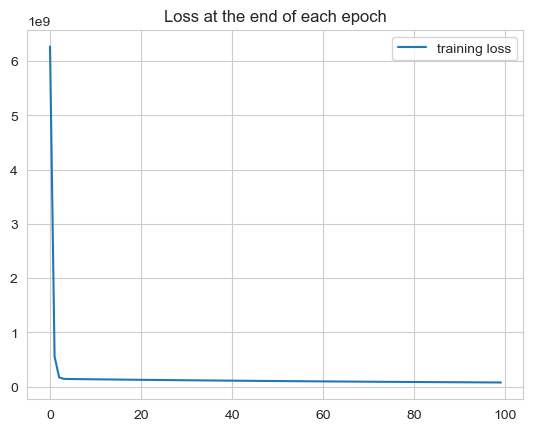

In [132]:
# Plots the MSE loss values after each training epoch
plt.plot(MSE, label='training loss')
plt.title('Loss at the end of each epoch')
plt.legend();

# 9. Save the Trained Mode Weights

In [70]:
# Save the model to an output file directory saved_LR_model
torch.save(model, './saved_LR_model')

RuntimeError: File ./saved_LR_model cannot be opened.

# 10. Load the Saved Model Weights File

In [19]:
# Load the model from an output file directory saved_LR_model
model = torch.load('saved_LR_model')

PermissionError: [Errno 13] Permission denied: 'saved_LR_model'

# 11. Make Predictions on the Test Dataset

In [133]:
# Python method to make predictions on test examples
def make_prediction(X_test):

    # Runs the Linear Regression model in inference mode
    # No gradients are required for inference mode at test time
    with torch.no_grad():
    
        # Linear regression model prediction on the test data
        prediction = model(Variable(torch.from_numpy(X_test))).data.numpy()
    
        # Prints the test data out to the screen
        return prediction

In [134]:
# Call the Python make_prediction method to make a prediction
pred = make_prediction(X_test)

pred

array([[121872.09 ],
       [ 67673.5  ],
       [105727.83 ],
       [ 72286.14 ],
       [ 48069.746],
       [ 53835.555]], dtype=float32)

# 12. Flatten the 2D PyTorch Tensors and Convert Them to NumPy Arrays

In [135]:
# Flattens the 2D pred array to 1D from the model and stores it in the flat Python variable
flat = pred.flatten()

flat

array([121872.09 ,  67673.5  , 105727.83 ,  72286.14 ,  48069.746,
        53835.555], dtype=float32)

In [136]:
# Prints out the y_test variable to the screen
y_test

array([[112636.],
       [ 67939.],
       [113813.],
       [ 83089.],
       [ 64446.],
       [ 57190.]], dtype=float32)

In [137]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.flatten()

y

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.],
      dtype=float32)

# 13. PLCC, SRCC and KRCC Performance Metrics Method

In [138]:
# Python method to calculate correlation coefficient metrics
def correlation(X, y):
    
    # Import Scipy libraray
    import scipy.stats
    
    # Calculate Pearson's Linear Correlation Coefficient with Scipy
    PLCC = scipy.stats.pearsonr(X, y)    # Pearson's r

    # Calculate Spearman Rank Correlation Coefficient (SRCC) with Scipy
    SRCC = scipy.stats.spearmanr(X, y)   # Spearman's rho

    # Calculate Kendalls Rank Correlation Coefficient (KRCC) with Scipy
    KRCC = scipy.stats.kendalltau(X, y)  # Kendall's tau
    
    # Prints out the correlation performance metric results to the screen
    print("PLCC: ", PLCC)
    print("SRCC: ", SRCC)
    print("KRCC: ", KRCC)

# 14. Evaluate PLCC, SRCC and KRCC Performance Metrics

In [139]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(flat, y)

PLCC:  PearsonRResult(statistic=0.9595453542236034, pvalue=0.0024217639483220363)
SRCC:  SpearmanrResult(correlation=0.8857142857142858, pvalue=0.01884548104956266)
KRCC:  KendalltauResult(correlation=0.7333333333333333, pvalue=0.05555555555555555)


# 15. Plot the Test Predictions

Text(0, 0.5, 'Salary (£)')

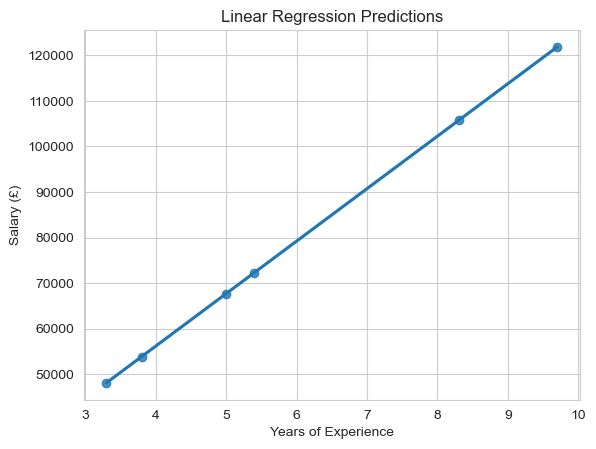

In [142]:
import seaborn as sns

# Sets the style of the line plot to whitegrid colour
sns.set_style('whitegrid')

# Stores the plot values in the axes variable and plots the line graph
axes = sns.regplot(x=X_test, y=pred)

# Sets the title, x-axis label and the y-axis labels of the plot
plt.title('Linear Regression Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (£)')

# 16. Display Jupyter Notebook Python Variables

In [47]:
# Prints out all the Python varriables from the Julyter Notebook
%whos

Variable           Type                Data/Info
------------------------------------------------
LinearRegression   type                <class '__main__.LinearRegression'>
MAE                function            <function MAE at 0x000002A4BD270550>
Variable           VariableMeta        <class 'torch.autograd.variable.Variable'>
X                  DataFrame               YearsExperience\n0   <...>10.4\n29             10.6
X_test             ndarray             6x1: 6 elems, type `float32`, 24 bytes
X_train            ndarray             24x1: 24 elems, type `float32`, 96 bytes
correlation        function            <function correlation at 0x000002A4AF8B7F70>
criterion          MSELoss             MSELoss()
df                 DataFrame               Unnamed: 0  YearsExpe<...>           10.6  121873.0
epoch              int                 99
epochs             int                 100
flat               ndarray             6: 6 elems, type `float32`, 24 bytes
inputs             Tensor  

# Sources
Kaggle.com., Salary Dataset - Simple linear regression., Available:

https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
